In [6]:
#Importing required packages
import pandas as pd 
import numpy as np 
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import ensemble,linear_model,neighbors,metrics,tree
from datetime import datetime

pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',400)

In [7]:
#Importing data:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

In [8]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
stores.Store.nunique()

45

In [10]:
feature.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
train.Dept.nunique()

81

In [13]:
test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [14]:
test.Dept.nunique()

81

In [15]:
pre_train = pd.merge(train,stores) 
train = pd.merge(pre_train,feature)
#
pre_test = pd.merge(test,stores)
test= pd.merge(pre_test,feature)

In [16]:
# train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [17]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [18]:
print(train.info())
print("---------------------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
-------------------

### 1. Training Data

In [19]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]
print(numeric_var_train)
print(cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [20]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T

In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x)).T

### 2. Testing Data

In [22]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print(numeric_var_test)
print(cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [23]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000,12.809930,1.640943e+02,1.000,1.000,3.000,5.000,11.000,22.000,33.000,40.000,43.000,45.000,45.000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000,30.656410,9.398155e+02,1.000,1.000,4.000,7.000,18.000,37.000,74.000,92.000,95.000,98.000,99.000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000,61106.926438,3.734056e+09,34875.000,34875.000,39690.000,39910.000,93638.000,140167.000,202505.000,204184.000,206302.000,219622.000,219622.000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470,18.724153,3.505939e+02,-7.290,11.440,23.980,29.970,39.820,54.470,67.350,79.480,83.820,92.140,101.950
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606,0.239442,5.733244e-02,2.872,2.957,3.161,3.227,3.431,3.606,3.766,3.866,3.951,4.079,4.125


In [24]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,115064,115064
NMISS,0,0
ColumnsNames,2012-12-21 3002 2012-12-07 2989 2012-12-...,"A 58713 B 44500 C 11851 Name: Type, d..."


In [25]:
train_corr=pd.DataFrame(train.corr())
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238


In [26]:
test_corr=pd.DataFrame(test.corr())
test_corr.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136


<AxesSubplot:title={'center':'correlation matrix of training data attributes'}>

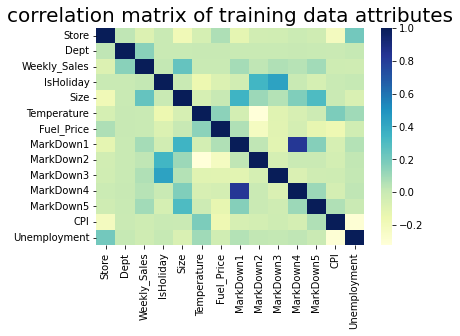

In [27]:
# visualize correlation matrix in Seaborn using a heatmap
ax=plt.axes()
ax.set_title("correlation matrix of training data attributes",fontsize=20)
sns.heatmap(train.corr(),cmap="YlGnBu",ax=ax)


<AxesSubplot:title={'center':'correlation matrix of testing data attributes'}>

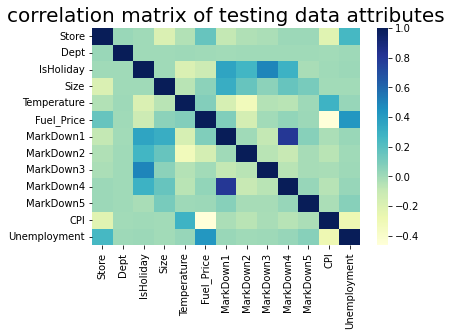

In [28]:
# visualize correlation matrix in Seaborn using a heatmap
ax=plt.axes()
ax.set_title("correlation matrix of testing data attributes",fontsize=20)
sns.heatmap(test.corr(),cmap="YlGnBu",ax=ax)

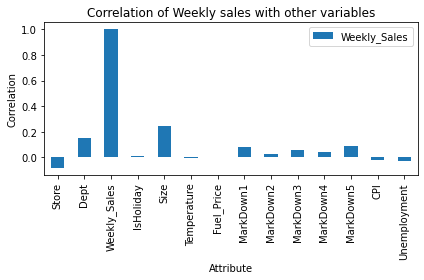

In [29]:
ax=train_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

#### Data Exploratory Analysis

Text(0.5, 1.0, 'Normalised store count in train data')

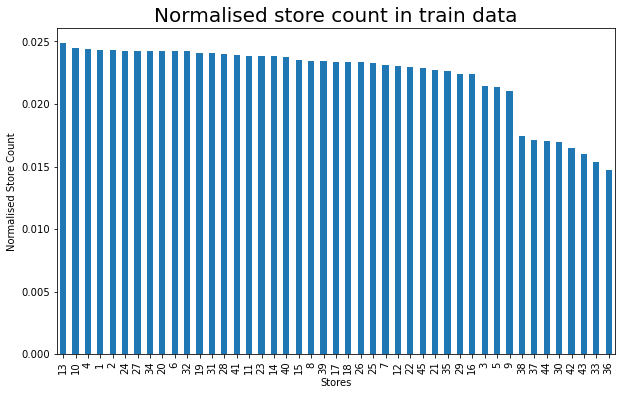

In [30]:
ax=train['Store'].value_counts(normalize=True).plot(kind = 'bar',figsize=(10,6))
plt.xlabel('Stores')
plt.ylabel('Normalised Store Count')
plt.title('Normalised store count in train data',fontsize=20)

In [31]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


Text(0.5, 1.0, 'Normalised Dept count in test data')

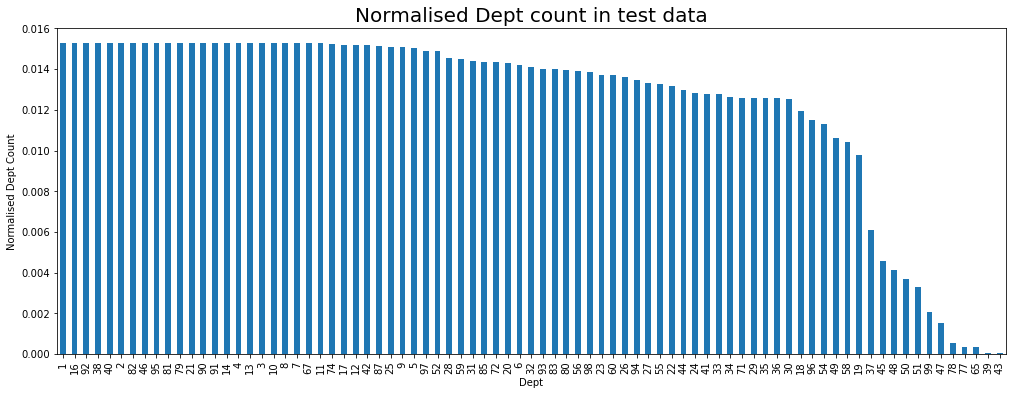

In [32]:
ax=train.Dept.value_counts(normalize=True).plot(kind = 'bar',figsize=(17,6))
plt.xlabel('Dept')
plt.ylabel('Normalised Dept Count')
plt.title('Normalised Dept count in test data',fontsize=20)

Text(0.5, 1.0, 'Density of weekly sales in train data')

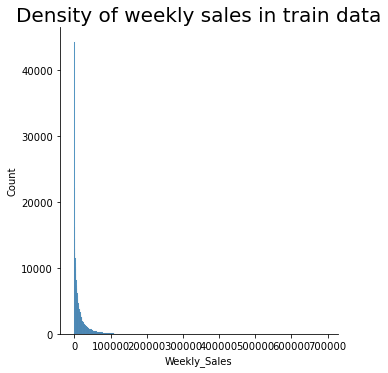

In [35]:
# print(train.Weekly_Sales)
ax=sns.displot(train.Weekly_Sales)
plt.title('Density of weekly sales in train data',fontsize=20)

#### Store Size vs Sales

<AxesSubplot:xlabel='Weekly_Sales'>

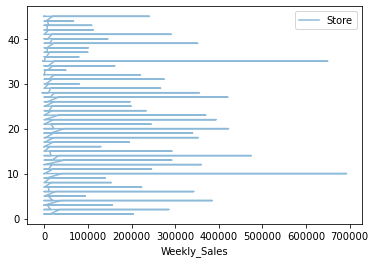

In [36]:
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

#### Sales vs Type

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Type'>

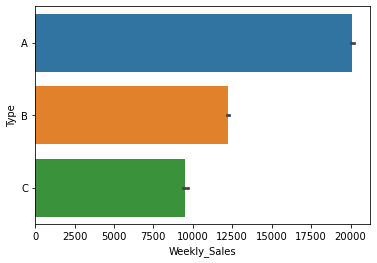

In [37]:
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

In [38]:
#### Sales vs Deptartment

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

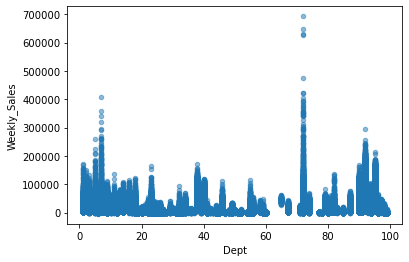

In [39]:
train.plot(kind='scatter', x='Dept', y='Weekly_Sales', alpha=0.5)

### Missing values treatments

In [40]:
print(train.isnull().sum())
print("_"*30)
print(test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
______________________________
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [41]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [42]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.median()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.median()))

In [43]:
train=train.fillna(0)
test=test.fillna(0)

In [44]:
print(train.isnull().sum())
print("_"*30)
print(test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
______________________________
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 68.0+ MB


### Feature Extraction

In [46]:
train_test_data = [train, test]

In [47]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [48]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [50]:
from sklearn.decomposition import PCA
train_test_data[0]
x = train_test_data[0].drop(["Date"], axis=1, inplace=False)
y = train_test_data[0]['Weekly_Sales']

pca=PCA(n_components=4)
principalComponents=pca.fit_transform(x);
principalDf=pd.DataFrame(data=principalComponents,columns=['pc1','pc2','pc3','pc4'])
finalDf=pd.concat([principalDf,y],axis=1)
print(finalDf.head(5))

            pc1           pc2          pc3         pc4  Weekly_Sales
0  15354.067702   7374.655897 -3610.658480 -705.675735      24924.50
1  18017.247359  32915.907442 -3677.789859 -925.001451      50605.27
2  14194.211000  -3748.961097 -3581.421693 -610.155977      13740.12
3  16912.680052  22322.543946 -3649.946764 -834.035041      39954.04
4  16111.607602  14639.850747 -3629.753940 -768.062878      32229.38


<AxesSubplot:title={'center':'correlation matrix of PCA reduced attributes'}>

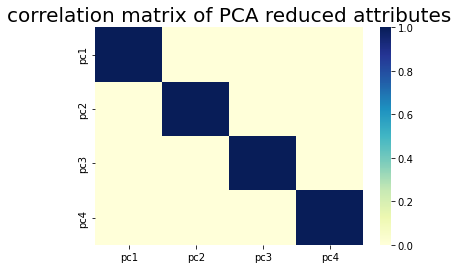

In [51]:
ax=plt.axes()
ax.set_title("correlation matrix of PCA reduced attributes",fontsize=20)
sns.heatmap(principalDf.corr(),cmap="YlGnBu",ax=ax)

In [44]:
# since there is no correlation between the PCA reduced attributes 
# therefore we can say that the problem of multicollinearity will be reduced when we apply Multiple Linear Regression 

### 1.Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score,f1_score
# from xgboost import XGBRegressor

In [69]:
clf = LinearRegression()
X=finalDf.drop('Weekly_Sales', axis=1, inplace=False)
Y=finalDf['Weekly_Sales']
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/5,random_state=0)
clf.fit(X_train, y_train)
y_pred_linear=clf.predict(x_test)
# print(y_pred_linear)
acc_linear=clf.score(x_test, y_test) * 100
print ('score:'+str(acc_linear) + ' percent')

score:99.99999508426141 percent


In [54]:
clf.coef_

array([ 0.10370337,  0.99456712, -0.00261326, -0.00854057])

In [55]:
clf.intercept_

15981.261124692823

In [58]:
# The Regression Equation Formed is

# Weekly_Sales = 15981.261124 + 0.10370337*pc1 + 0.99456712*pc2 - 0.00261326*pc3 - 0.00854057*pc4

### 2. Decision Tree

In [66]:
clf=DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_dt= clf.predict(x_test)
acc_dt = clf.score(x_test, y_test) * 100
print (str(acc_dt) + ' percent')

99.98661778242287 percent


### Comparing Models
### Let's compare the accuracy score of all the models used above.

In [70]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree'],
    
    'Score': [acc_linear,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,99.999995
1,Decision Tree,99.986618


### Predicting Sales value for test data based on highest score model.

In [71]:
# Prediction value using Random Forest model..
# test
req_test = test.iloc[:84314, :]
submission_linear = pd.DataFrame({
        "Date": req_test.Date.astype(str),
        "Store": req_test.Store.astype(str),
        "Dept": req_test.Dept.astype(str),
        "Weekly_Sales": y_pred_linear
    })


In [72]:
submission_dt = pd.DataFrame({
        "Date": req_test.Date.astype(str),
        "Store": req_test.Store.astype(str),
        "Dept": req_test.Dept.astype(str),
        "Weekly_Sales": y_pred_dt
    })

In [73]:
submission_linear.head()

,Date,Store,Dept,Weekly_Sales
0,2012-11-02,1,1,2887.091986
1,2012-11-02,1,2,93153.312882
2,2012-11-02,1,3,8419.526735
3,2012-11-02,1,4,41099.548415
4,2012-11-02,1,5,1155.444358


Text(0.5, 1.0, 'Comparison between Linear Regression & Decision Tree predictions')

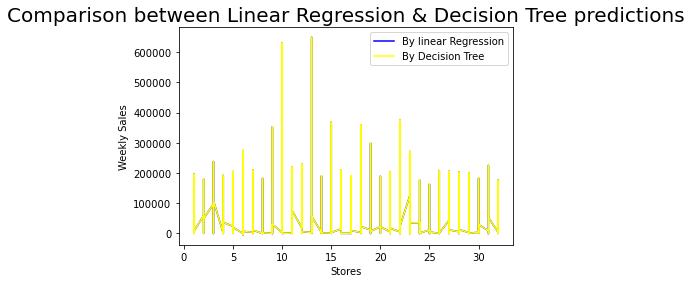

In [74]:
x1 = [int(i) for i in submission_linear['Store']]
y1 = [int(i) for i in submission_linear['Weekly_Sales']]
ax=ax=plt.axes()
plt.plot(x1, y1, label="By linear Regression",color='blue')
x2 = [int(i) for i in submission_linear['Store']]
y2 = [int(i) for i in submission_linear['Weekly_Sales']]
plt.plot(x2, y2, label="By Decision Tree",color='yellow')
plt.legend()
ax.set_xlabel('Stores')
ax.set_ylabel('Weekly Sales')
ax.set_title('Comparison between Linear Regression & Decision Tree predictions',fontsize=20)